In [86]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [87]:
# First, we observe the dataset and determine which dataset is relevant to our analysis.
df = pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [88]:
# In my analysis, I do not consider street name, block and  flat model is relevant (town is sufficient for analysis, as no description of impact of the address, e.g., near MRT or not). Some information in flat model are either similar to room type (2 room, multi generation, etc.) or it reflected how old the unit is, which can be represented by lease commence date and remaining lease.Therefore. I will drop this column for my analysis
df = df.drop(['month','street_name','flat_model','lease_commence_date', 'block'], axis=1)

In [89]:
# Let's rename the column so it will be clearer
df = df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [90]:
# I assume EXECUTIVE is equal to a 6 room (5 room + 1 study room). MULTI-GENERATION is equal to a 5 room (it served the same purpose).
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
df['number_of_rooms'] = df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [91]:
# I assume that rather we use floor range, I the possible highest floor within the unit storey range.
df['storey'] = df['storey'].str[-2:].astype('int')

In [92]:
# I revise the format of the data in the remaining lease to be quantifiable (change to float).
df['remaining_lease'] = df['remaining_lease'].str.split(' ')
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: (float(x[0])+(float(x[2])/12)) if (len(x)==4) else float(x[0]))
df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,2,12,44.0,61.333333,232000.0
1,ANG MO KIO,3,3,67.0,60.583333,250000.0
2,ANG MO KIO,3,3,67.0,62.416667,262000.0
3,ANG MO KIO,3,6,68.0,62.083333,265000.0
4,ANG MO KIO,3,3,67.0,62.416667,265000.0


In [93]:
# Observe whether there is missing data or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165391 entries, 0 to 165390
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             165391 non-null  object 
 1   number_of_rooms  165391 non-null  int32  
 2   storey           165391 non-null  int32  
 3   floor_area_sqm   165391 non-null  float64
 4   remaining_lease  165391 non-null  float64
 5   resale_price     165391 non-null  float64
dtypes: float64(3), int32(2), object(1)
memory usage: 6.3+ MB


In [94]:
df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

In [95]:
# First, we want to se ethe distribution of HDB resale price in Singapore
sns.displot(df['resale_price'])

C:\Users\goutham\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [96]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [97]:
df = df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
df = df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
df = df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
df = df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
df = df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [98]:
# Let's check whether the data replacement was done properly
df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [99]:
df = df.rename(columns={'town':'region'})

In [100]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [102]:
X[1,:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 67.0, 60.583333333333336],
      dtype=object)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [104]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [105]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.6638570462302901

In [106]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.7404876153849373

In [107]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.8029524673715853

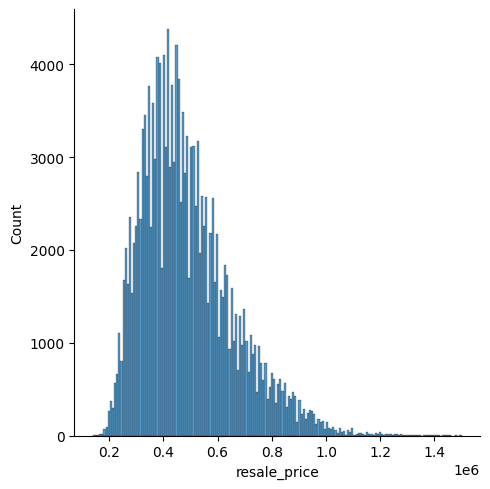

<Figure size 1500x1000 with 0 Axes>

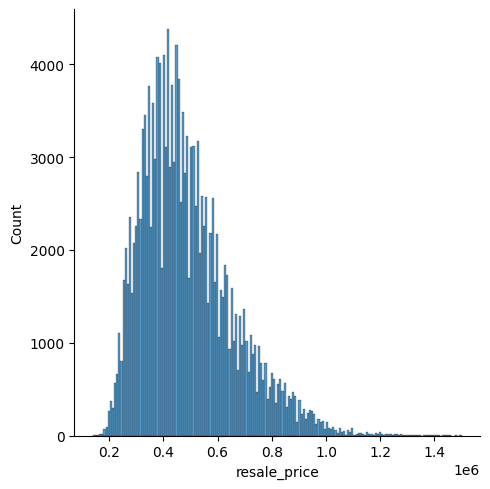

<Figure size 1500x1000 with 0 Axes>

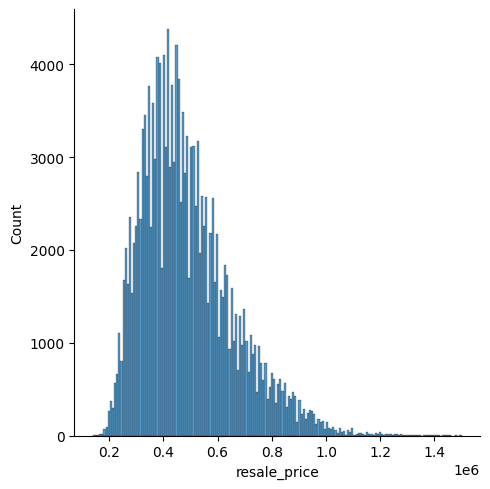

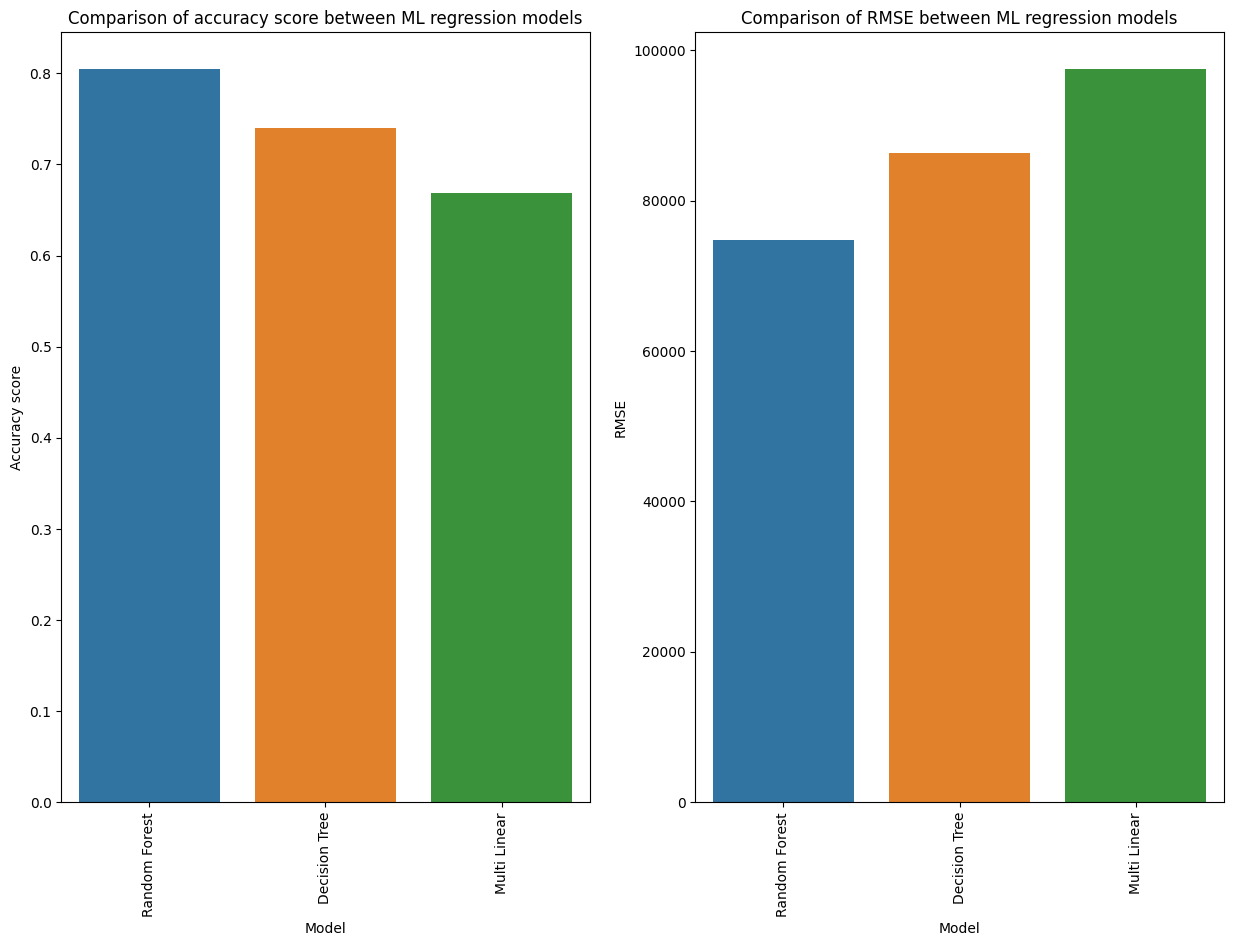

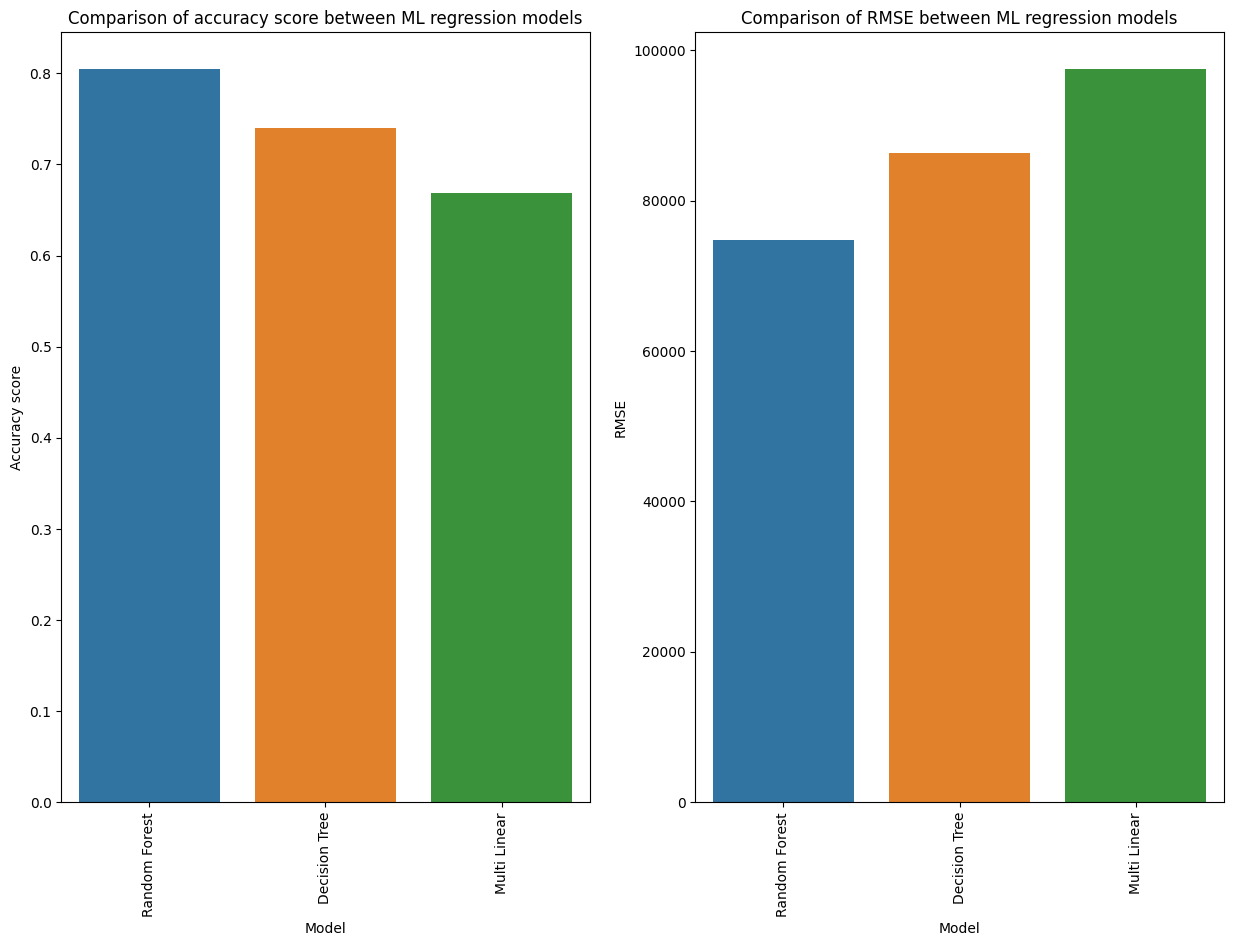

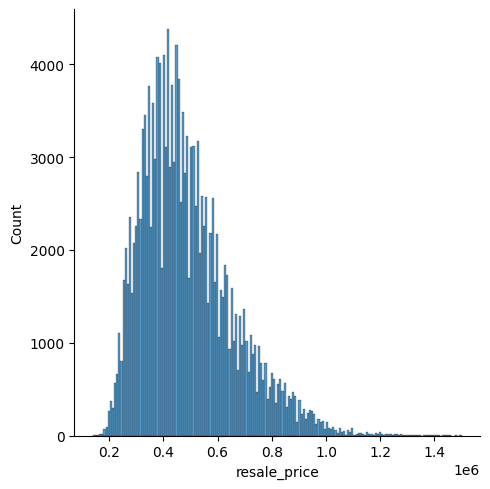

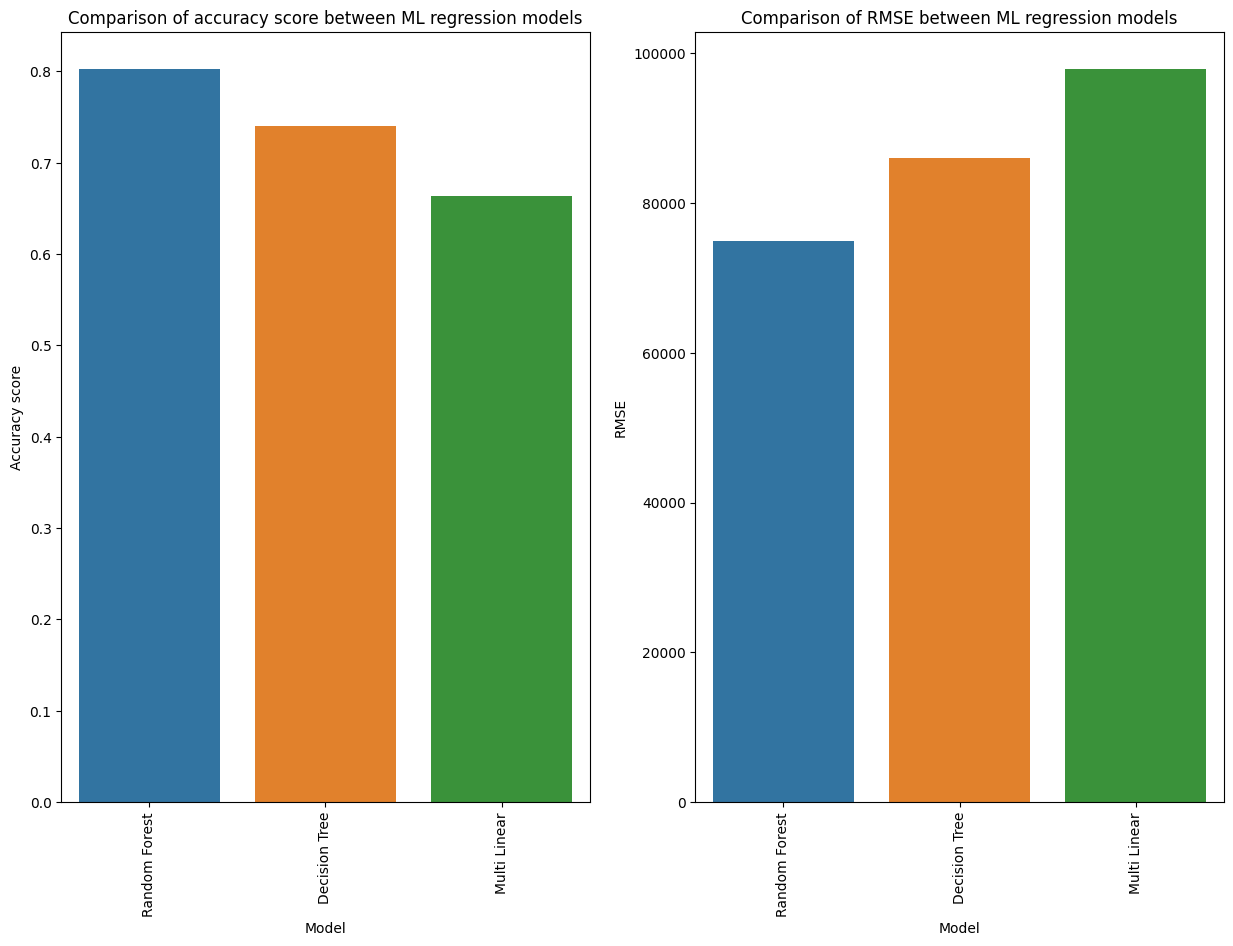

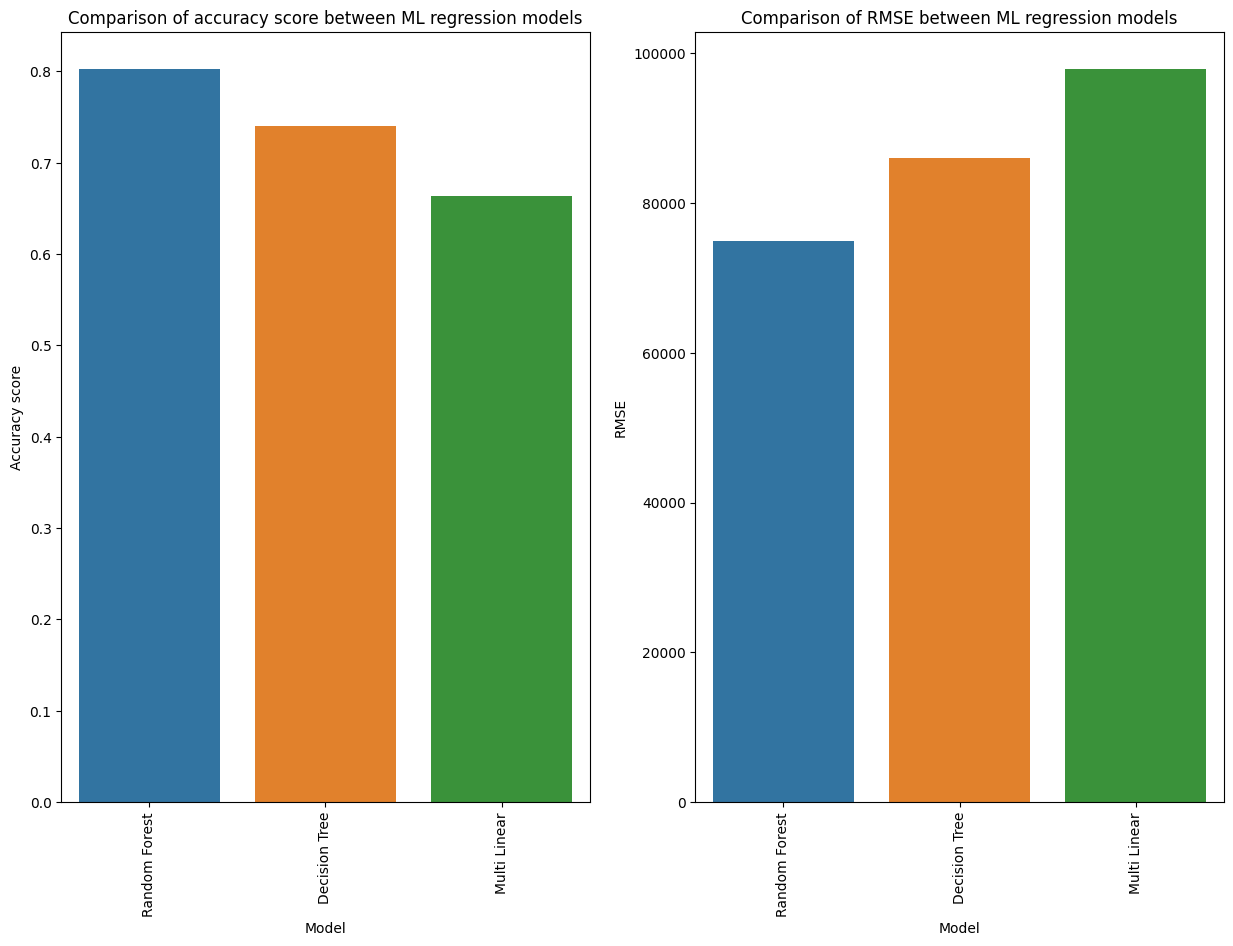

In [109]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))

# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))

# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

In [110]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()






,Area,Predicted HDB price (SGD)
0,Central,687800.0
1,East,645066.0
2,North,458400.0
3,South,765722.0
4,West,528467.0
